# Data Wrangling with Penguins

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np

##  Loading and combining datasets
+ Load into dataframes:

  + One .csv file for each species: ```penguins_gentoo.csv```, ```penguins_chinstrap.csv```, ```penguins_adelie.csv```
+ Inspect the DataFrames
+ Use pd.concat() Combine the species' dataframes into one ```df_all```  

---
+ Load into a dataframe:
  + One .csv file for the penguins' sex : ```sex_data_penguins.csv```
+ Inspect the dataframe

+ What strategy we can think of to combine ```df_all``` with penguins' sex dataframe? 

In [90]:
!ls

Data_Wrangling_EE.ipynb merge_leftright.png     penguins_gentoo.csv
concat.png              penguins_adelie.csv     sex_data_penguins.csv
merge.png               penguins_chinstrap.csv


In [91]:
# Load a single file
gentoo_df = pd.read_csv('penguins_gentoo.csv')
gentoo_df

,studyName,Sample Number,Species,Sample ID,Region,Island,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Comments
0,PAL0708,1,Gentoo,G_1,Anvers,Biscoe,N31A1,46.1,13.2,211.0,4500.0,NaN
1,PAL0708,2,Gentoo,G_2,Anvers,Biscoe,N31A2,50.0,16.3,230.0,5700.0,NaN
2,PAL0708,3,Gentoo,G_3,Anvers,Biscoe,N32A1,48.7,14.1,210.0,4450.0,NaN
3,PAL0708,4,Gentoo,G_4,Anvers,Biscoe,N32A2,50.0,15.2,218.0,5700.0,NaN
4,PAL0708,5,Gentoo,G_5,Anvers,Biscoe,N33A1,47.6,14.5,215.0,5400.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
119,PAL0910,120,Gentoo,G_120,Anvers,Biscoe,N38A2,NaN,NaN,NaN,NaN,NaN
120,PAL0910,121,Gentoo,G_121,Anvers,Biscoe,N39A1,46.8,14.3,215.0,4850.0,NaN
121,PAL0910,122,Gentoo,G_122,Anvers,Biscoe,N39A2,50.4,15.7,222.0,5750.0,NaN
122,PAL0910,123,Gentoo,G_123,Anvers,Biscoe,N43A1,45.2,14.8,212.0,5200.0,NaN


In [92]:
# how to automate the "read"
import os

In [93]:
!ls

Data_Wrangling_EE.ipynb merge_leftright.png     penguins_gentoo.csv
concat.png              penguins_adelie.csv     sex_data_penguins.csv
merge.png               penguins_chinstrap.csv


In [94]:
# returns results of ls as a list
os.listdir()

['sex_data_penguins.csv',
 'Data_Wrangling_EE.ipynb',
 'merge_leftright.png',
 'merge.png',
 'penguins_chinstrap.csv',
 'concat.png',
 'penguins_gentoo.csv',
 '.ipynb_checkpoints',
 'penguins_adelie.csv']

In [95]:
# Load multiple dataframes into a list
df_list = []
for file in os.listdir():
    if file.startswith('penguins'):
        df = pd.read_csv(file)
        df_list.append(df)


In [96]:
len(df_list)

3

In [97]:
# Combine all three dataframes in a dataframe
# pd.concat() takes a list as argument
df_all = pd.concat(df_list).reset_index(drop=True)

In [98]:
df_all.shape

(344, 12)

In [99]:
df_all.head()

,studyName,Sample Number,Species,Sample ID,Region,Island,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Comments
0,PAL0708,1,Chinstrap,C_1,Anvers,Dream,N61A1,46.5,17.9,192.0,3500.0,NaN
1,PAL0708,2,Chinstrap,C_2,Anvers,Dream,N61A2,50.0,19.5,196.0,3900.0,NaN
2,PAL0708,3,Chinstrap,C_3,Anvers,Dream,N62A1,51.3,19.2,193.0,3650.0,NaN
3,PAL0708,4,Chinstrap,C_4,Anvers,Dream,N62A2,45.4,18.7,188.0,3525.0,NaN
4,PAL0708,5,Chinstrap,C_5,Anvers,Dream,N64A1,52.7,19.8,197.0,3725.0,NaN


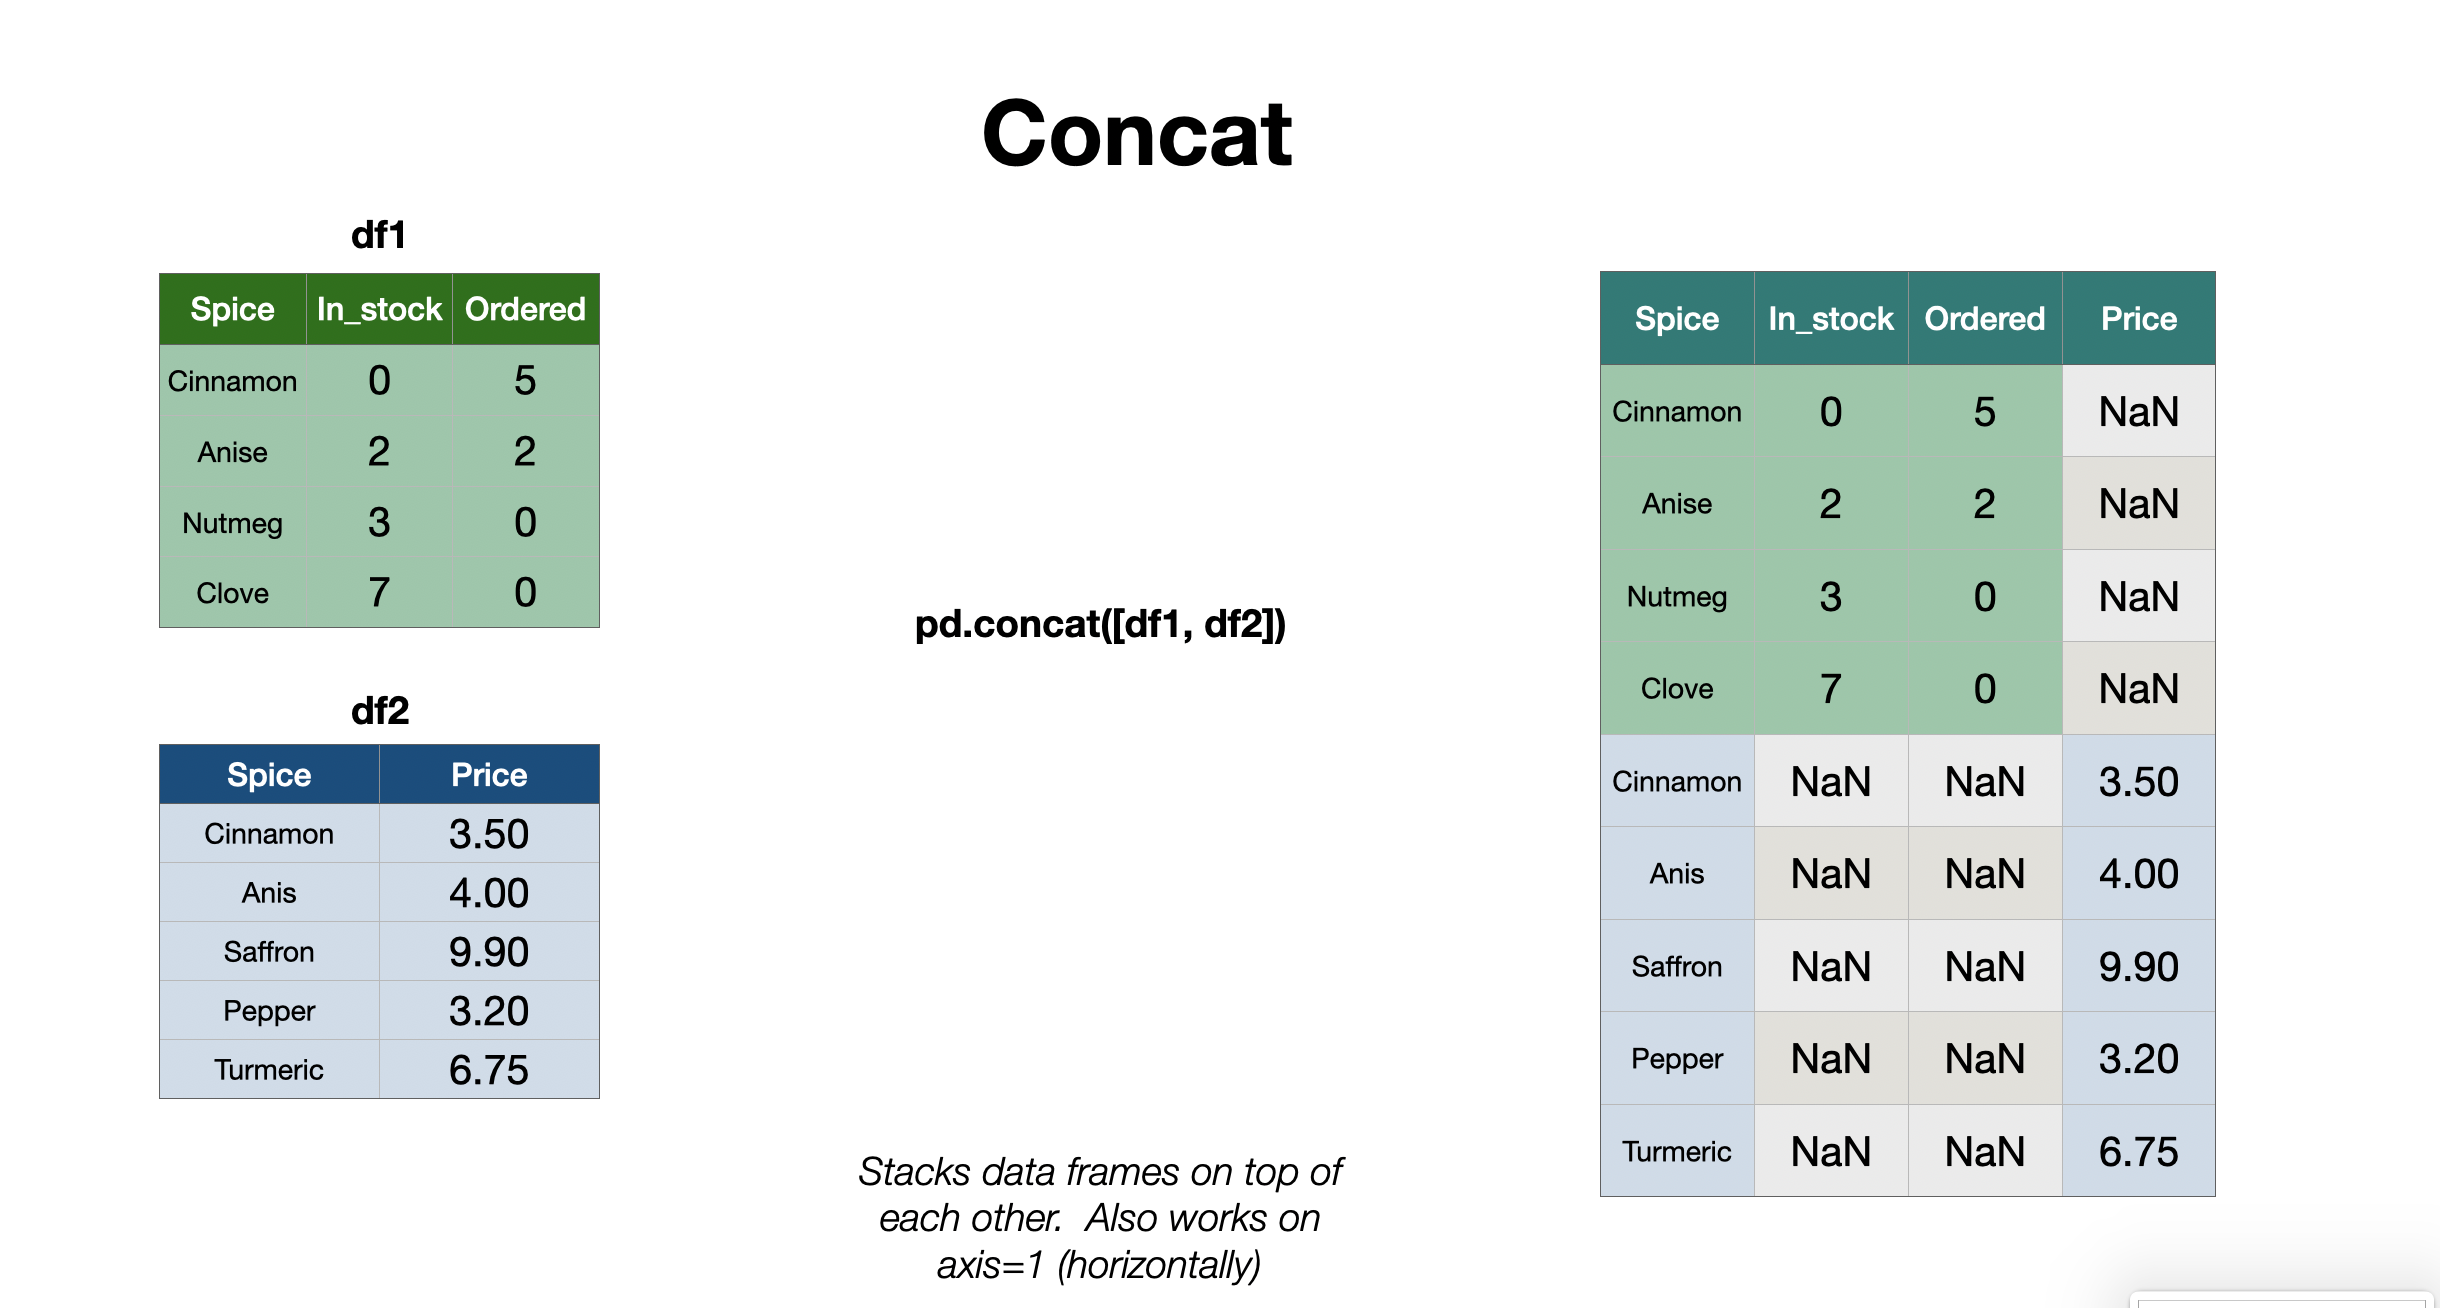

In [100]:
df_all

,studyName,Sample Number,Species,Sample ID,Region,Island,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Comments
0,PAL0708,1,Chinstrap,C_1,Anvers,Dream,N61A1,46.5,17.9,192.0,3500.0,NaN
1,PAL0708,2,Chinstrap,C_2,Anvers,Dream,N61A2,50.0,19.5,196.0,3900.0,NaN
2,PAL0708,3,Chinstrap,C_3,Anvers,Dream,N62A1,51.3,19.2,193.0,3650.0,NaN
3,PAL0708,4,Chinstrap,C_4,Anvers,Dream,N62A2,45.4,18.7,188.0,3525.0,NaN
4,PAL0708,5,Chinstrap,C_5,Anvers,Dream,N64A1,52.7,19.8,197.0,3725.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,148,Adelie,A_148,Anvers,Dream,N83A2,36.6,18.4,184.0,3475.0,NaN
340,PAL0910,149,Adelie,A_149,Anvers,Dream,N84A1,36.0,17.8,195.0,3450.0,NaN
341,PAL0910,150,Adelie,A_150,Anvers,Dream,N84A2,37.8,18.1,193.0,3750.0,NaN
342,PAL0910,151,Adelie,A_151,Anvers,Dream,N85A1,36.0,17.1,187.0,3700.0,NaN


### We are missing the sex-data!
+ Fortunately that data exists in another .csv file.
+ How can we "merge" the sex data into our current DataFrame? 

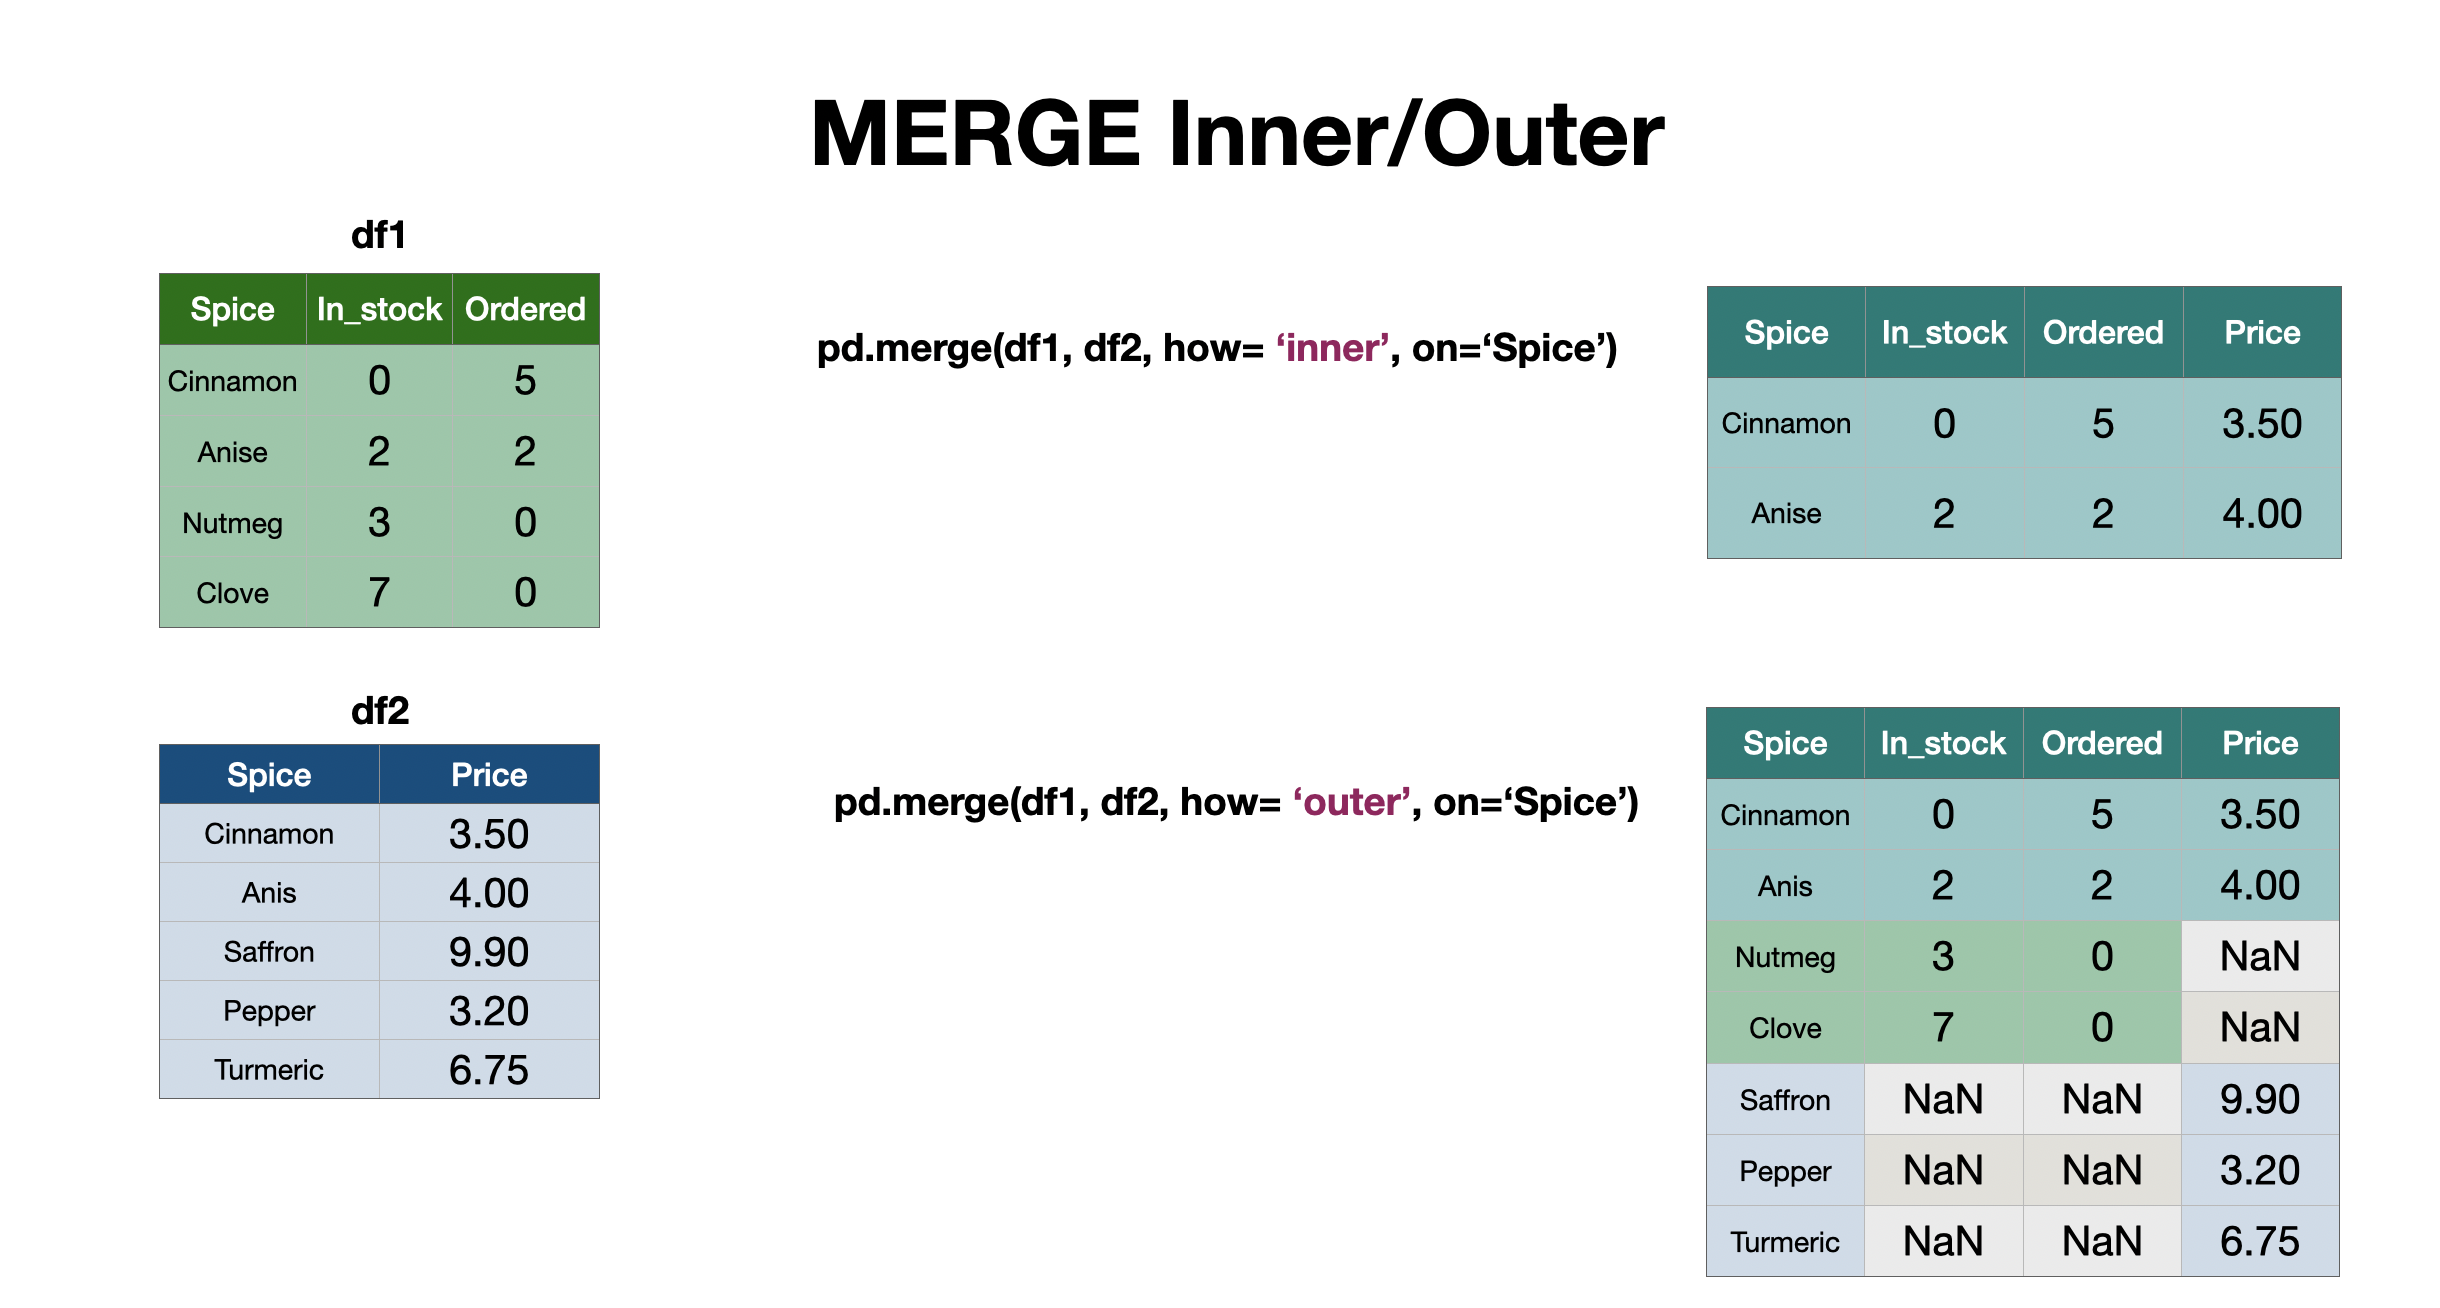

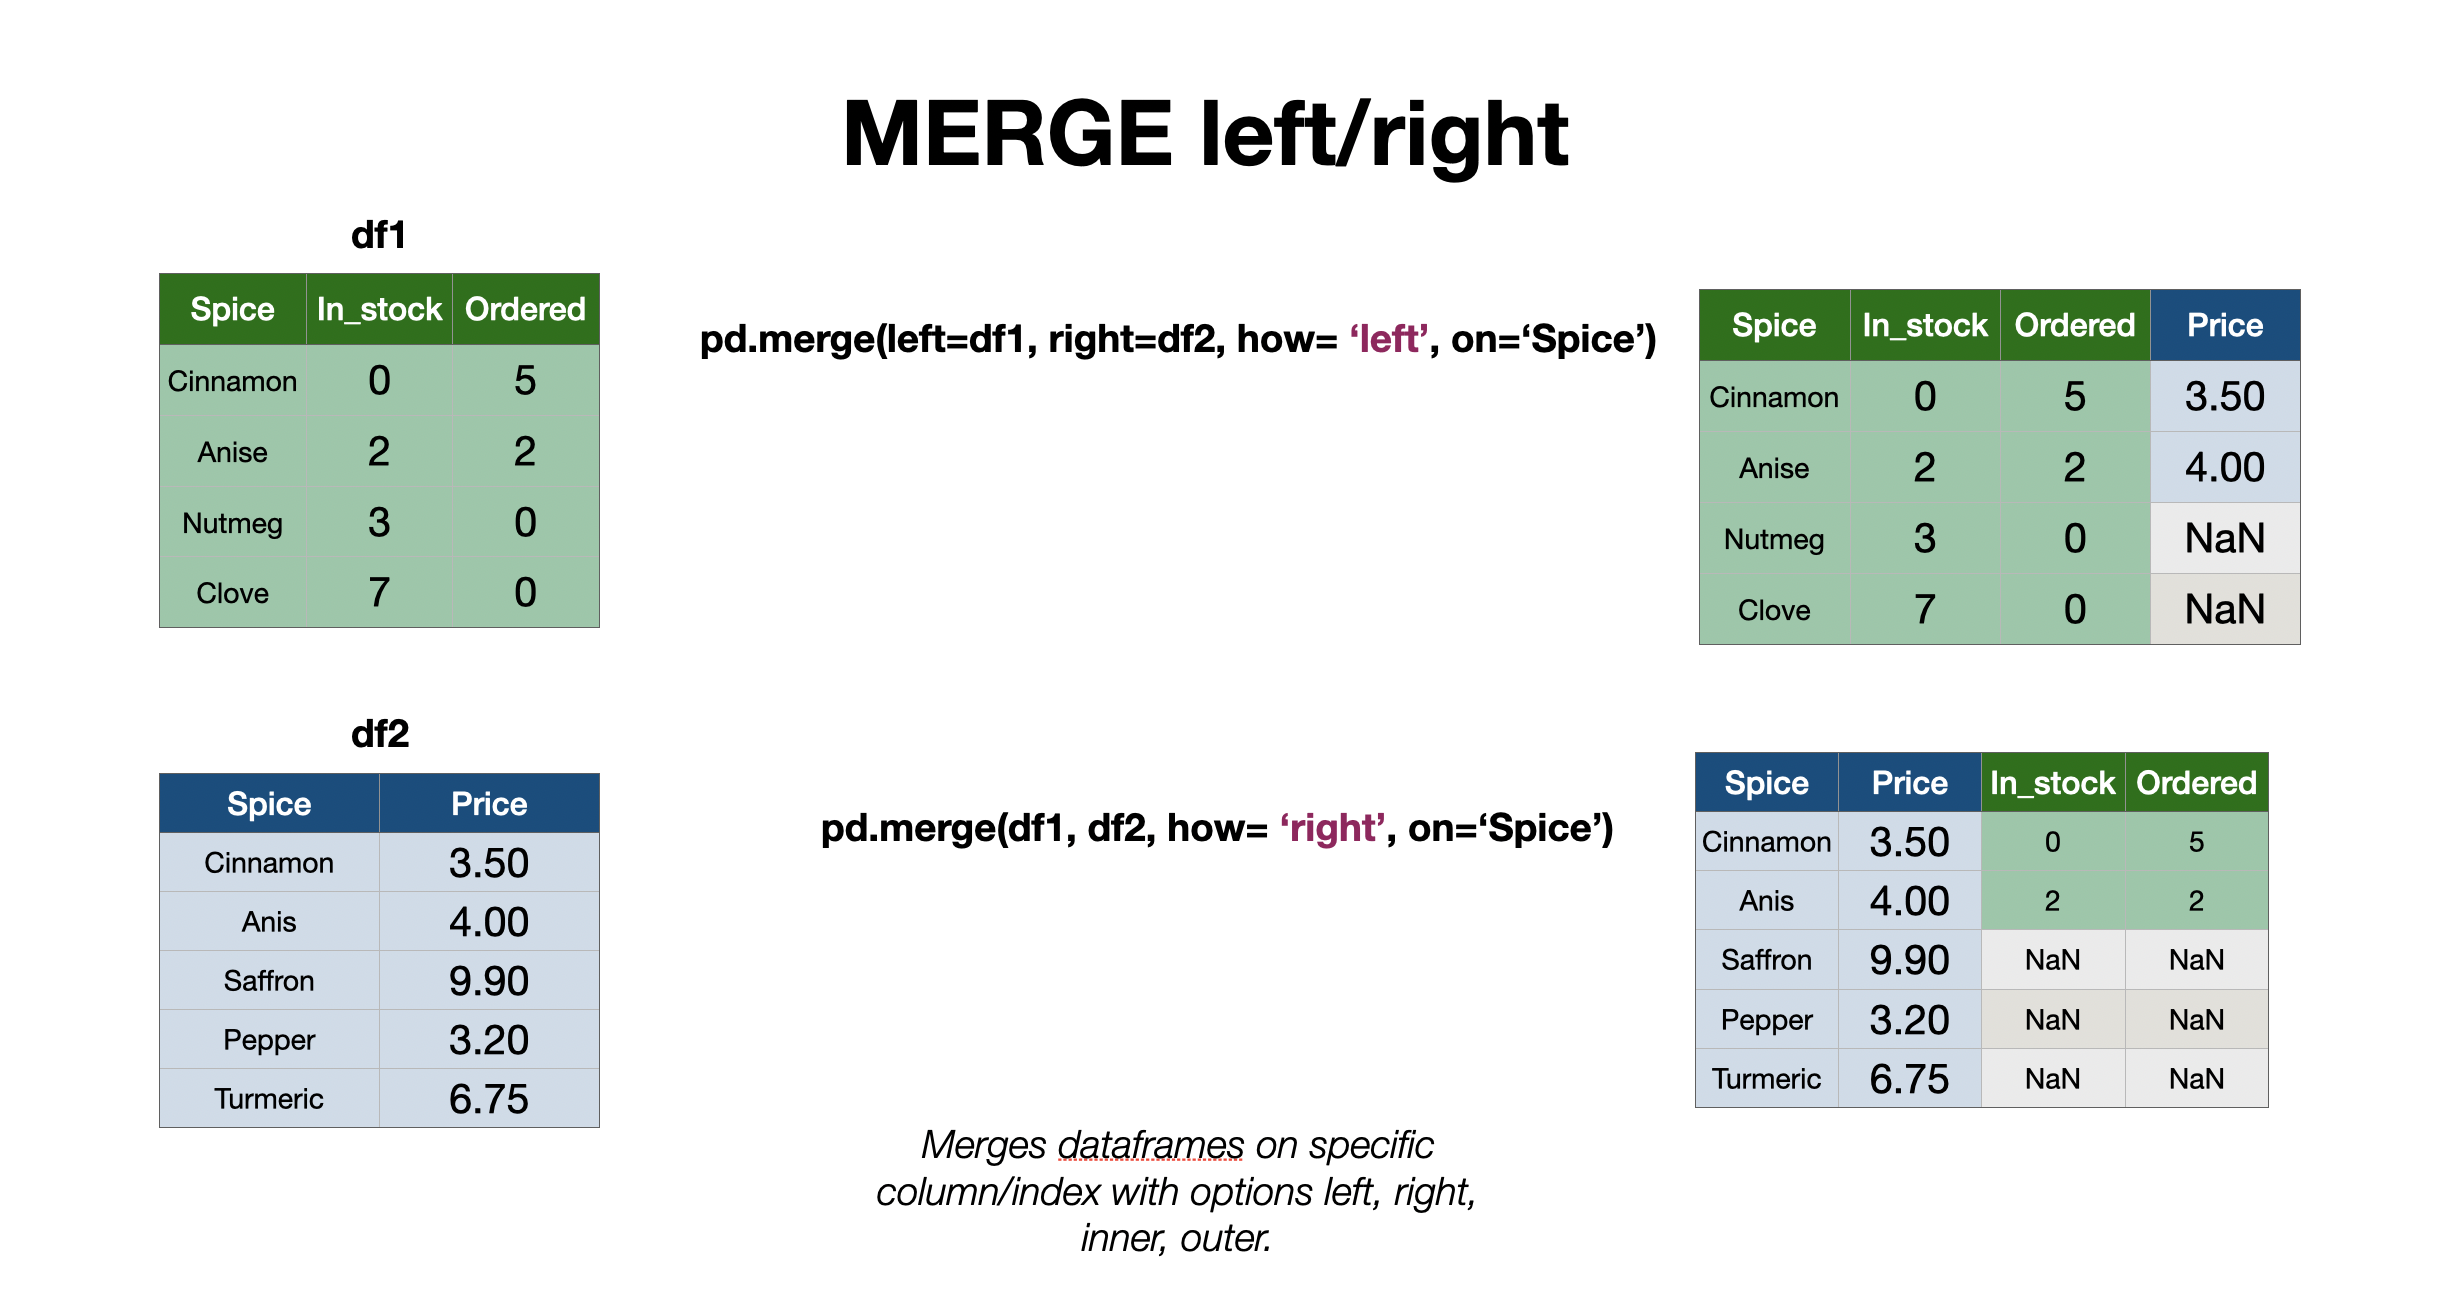

In [101]:
#df_all.head(70)

In [102]:
# read in the file
df_sex =pd.read_csv('sex_data_penguins.csv')
df_sex.head()

,Sex,Sample Number,Species
0,MALE,1,Adelie
1,FEMALE,2,Adelie
2,FEMALE,3,Adelie
3,NaN,4,Adelie
4,FEMALE,5,Adelie


In [103]:
df_sex.shape

(344, 3)

In [104]:
df_sex['Sample Number'].nunique()

152

In [105]:
df_all['Sample Number'].nunique()

152

In [106]:
df_all['Sample ID'].nunique()

344

In [107]:
df_all.iloc[12]

studyName                PAL0708
Sample Number                 13
Species                Chinstrap
Sample ID                   C_13
Region                    Anvers
Island                     Dream
Individual ID              N69A1
Culmen Length (mm)          47.0
Culmen Depth (mm)           17.3
Flipper Length (mm)        185.0
Body Mass (g)             3700.0
Comments                     NaN
Name: 12, dtype: object

In [108]:
df_sex.iloc[12]

Sex              FEMALE
Sample Number        13
Species          Adelie
Name: 12, dtype: object

In [109]:
# create a new column 'Sample ID' to match format of Sample ID in the other DFs
df_all.head(3)

,studyName,Sample Number,Species,Sample ID,Region,Island,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Comments
0,PAL0708,1,Chinstrap,C_1,Anvers,Dream,N61A1,46.5,17.9,192.0,3500.0,NaN
1,PAL0708,2,Chinstrap,C_2,Anvers,Dream,N61A2,50.0,19.5,196.0,3900.0,NaN
2,PAL0708,3,Chinstrap,C_3,Anvers,Dream,N62A1,51.3,19.2,193.0,3650.0,NaN


In [110]:
df_sex.head(3)

,Sex,Sample Number,Species
0,MALE,1,Adelie
1,FEMALE,2,Adelie
2,FEMALE,3,Adelie


In [111]:
df_sex['Sample Number']

0        1
1        2
2        3
3        4
4        5
      ... 
339    120
340    121
341    122
342    123
343    124
Name: Sample Number, Length: 344, dtype: int64

In [112]:
df_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sex            334 non-null    object
 1   Sample Number  344 non-null    int64 
 2   Species        344 non-null    object
dtypes: int64(1), object(2)
memory usage: 8.2+ KB


In [113]:
df_sex['Species'].str

In [114]:
df_sex["Sample ID"]= df_sex['Species'].str[0]+"_"+df_sex['Sample Number'].astype(str)

In [115]:
df_sex.head()

,Sex,Sample Number,Species,Sample ID
0,MALE,1,Adelie,A_1
1,FEMALE,2,Adelie,A_2
2,FEMALE,3,Adelie,A_3
3,NaN,4,Adelie,A_4
4,FEMALE,5,Adelie,A_5


In [116]:
# Drop unnecessary columns
df_sex.drop(['Sample Number','Species'],axis=1,inplace=True)

In [117]:
df_sex.head()

,Sex,Sample ID
0,MALE,A_1
1,FEMALE,A_2
2,FEMALE,A_3
3,NaN,A_4
4,FEMALE,A_5


In [118]:
df_all.shape

(344, 12)

In [119]:
df_sex.shape

(344, 2)

In [120]:
# merge sex data with df_all
df_completed = pd.merge(df_all,df_sex,on='Sample ID')

In [121]:
df_completed.head()

,studyName,Sample Number,Species,Sample ID,Region,Island,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Comments,Sex
0,PAL0708,1,Chinstrap,C_1,Anvers,Dream,N61A1,46.5,17.9,192.0,3500.0,NaN,FEMALE
1,PAL0708,2,Chinstrap,C_2,Anvers,Dream,N61A2,50.0,19.5,196.0,3900.0,NaN,MALE
2,PAL0708,3,Chinstrap,C_3,Anvers,Dream,N62A1,51.3,19.2,193.0,3650.0,NaN,MALE
3,PAL0708,4,Chinstrap,C_4,Anvers,Dream,N62A2,45.4,18.7,188.0,3525.0,NaN,FEMALE
4,PAL0708,5,Chinstrap,C_5,Anvers,Dream,N64A1,52.7,19.8,197.0,3725.0,NaN,MALE


### Checking for Missing Values

In [122]:
#info
df_completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 343
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Sample ID            344 non-null    object 
 4   Region               344 non-null    object 
 5   Island               344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Culmen Length (mm)   342 non-null    float64
 8   Culmen Depth (mm)    342 non-null    float64
 9   Flipper Length (mm)  342 non-null    float64
 10  Body Mass (g)        342 non-null    float64
 11  Comments             26 non-null     object 
 12  Sex                  334 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 37.6+ KB


```df.isna()```, ```df.isnull()```

In [123]:
# Count how many NaN for each colum
df_completed.isna().sum()

studyName                0
Sample Number            0
Species                  0
Sample ID                0
Region                   0
Island                   0
Individual ID            0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Comments               318
Sex                     10
dtype: int64

In [124]:
#df_completed.isnull()

<AxesSubplot:>

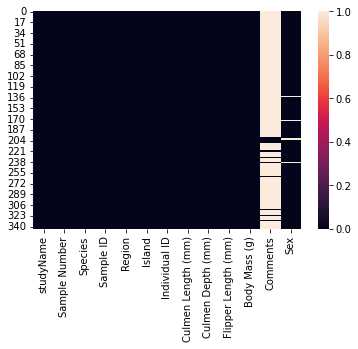

In [125]:
# Visualize the NaN with the seaborn heatmap
sns.heatmap(df_completed.isnull())

In [126]:
# drop NaN with a threshold, axis=1 means we drop column rather than row
df_completed.dropna(thresh=318, axis=1, inplace=True)

In [127]:
df_completed.head()

,studyName,Sample Number,Species,Sample ID,Region,Island,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,PAL0708,1,Chinstrap,C_1,Anvers,Dream,N61A1,46.5,17.9,192.0,3500.0,FEMALE
1,PAL0708,2,Chinstrap,C_2,Anvers,Dream,N61A2,50.0,19.5,196.0,3900.0,MALE
2,PAL0708,3,Chinstrap,C_3,Anvers,Dream,N62A1,51.3,19.2,193.0,3650.0,MALE
3,PAL0708,4,Chinstrap,C_4,Anvers,Dream,N62A2,45.4,18.7,188.0,3525.0,FEMALE
4,PAL0708,5,Chinstrap,C_5,Anvers,Dream,N64A1,52.7,19.8,197.0,3725.0,MALE


<AxesSubplot:>

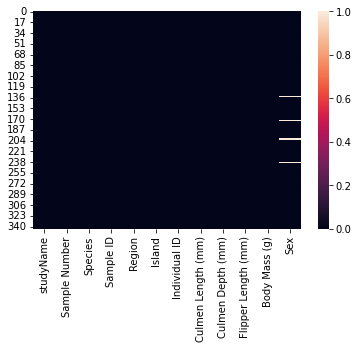

In [128]:
sns.heatmap(df_completed.isnull())


In [129]:
df_completed

,studyName,Sample Number,Species,Sample ID,Region,Island,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,PAL0708,1,Chinstrap,C_1,Anvers,Dream,N61A1,46.5,17.9,192.0,3500.0,FEMALE
1,PAL0708,2,Chinstrap,C_2,Anvers,Dream,N61A2,50.0,19.5,196.0,3900.0,MALE
2,PAL0708,3,Chinstrap,C_3,Anvers,Dream,N62A1,51.3,19.2,193.0,3650.0,MALE
3,PAL0708,4,Chinstrap,C_4,Anvers,Dream,N62A2,45.4,18.7,188.0,3525.0,FEMALE
4,PAL0708,5,Chinstrap,C_5,Anvers,Dream,N64A1,52.7,19.8,197.0,3725.0,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,148,Adelie,A_148,Anvers,Dream,N83A2,36.6,18.4,184.0,3475.0,FEMALE
340,PAL0910,149,Adelie,A_149,Anvers,Dream,N84A1,36.0,17.8,195.0,3450.0,FEMALE
341,PAL0910,150,Adelie,A_150,Anvers,Dream,N84A2,37.8,18.1,193.0,3750.0,MALE
342,PAL0910,151,Adelie,A_151,Anvers,Dream,N85A1,36.0,17.1,187.0,3700.0,FEMALE


In [130]:
df_completed['Culmen Depth (mm)'].fillna(value=df_completed['Culmen Depth (mm)'].mean(), inplace=True)

In [131]:
df_completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Sample ID            344 non-null    object 
 4   Region               344 non-null    object 
 5   Island               344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Culmen Length (mm)   342 non-null    float64
 8   Culmen Depth (mm)    344 non-null    float64
 9   Flipper Length (mm)  342 non-null    float64
 10  Body Mass (g)        342 non-null    float64
 11  Sex                  334 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 34.9+ KB


# Ideas for next steps: 
- Do the exercise in [1.9](https://spiced.space/euclidean-eukalyptus/ds-course/chapters/project_gapminder/data_wrangling.html)
- Some Recap exercises:
    - https://www.academis.eu/posts/data_analysis_EN/seven_lines/select_df.md
    - https://www.academis.eu/posts/data_analysis_EN/seven_lines/filter_df.md
    - https://www.academis.eu/posts/data_analysis_EN/seven_lines/plot.md
- Open gapminder life expectancy data in pandas, and:
    - find an interesting statistic to share on Slack
    - plot an interesting finding and share the plot on Slack
- Read chapter 8 from [Storytelling with Data by Cole Nussbaumer Knaflic](https://github.com/AmandaZou/Data-Science-books-/blob/master/storytelling-with-data-cole-nussbaumer-knaflic.pdf) for a nice primer on how to create beautiful and effective data visualizations
- Get started on the first steps (1-5) of the [Animated Scatterplot Exercise 1.8.2](https://spiced.space/euclidean-eukalyptus/ds-course/chapters/project_gapminder/long_vs_wide.html)